In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
df = pd.read_csv("data/all_songs_clustered.csv")

In [3]:
df

,uri,artist,title,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,pc1,pc2,label
0,spotify:track:1iaTDu4PCIWQQOwwwqq5qW,Said the Sky,All I Got,0.325,0.578,-6.786,0.0455,0.158000,0.575,0.103,144.745,-0.165722,0.541033,3
1,spotify:track:6Q3K9gVUZRMZqZKrXovbM2,Kygo,I'll Wait,0.611,0.651,-6.973,0.0587,0.148000,0.105,0.357,122.983,-0.165114,0.068425,4
2,spotify:track:75ZKw8JLaFsYr51J44fQ4N,joan,drive all night,0.542,0.758,-5.032,0.0313,0.000184,0.144,0.430,156.128,-0.447970,0.189226,3
3,spotify:track:6Wz9rIfo9tOBcVCd1Mo7F7,Nightly,Twenty Something,0.641,0.589,-6.305,0.0275,0.096000,0.208,0.110,100.001,-0.125609,0.129021,4
4,spotify:track:1Srt81FTalOhRw7t7l8Yh8,Lauv,Tattoos Together,0.862,0.400,-7.486,0.0736,0.005750,0.123,0.596,122.963,-0.092945,-0.245872,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,spotify:track:7uzmGiiJyRfuViKKK3lVmR,Bazzi,Mine,0.710,0.789,-3.874,0.0722,0.016100,0.451,0.717,142.929,-0.486988,-0.214972,0
235,spotify:track:2cvOfKHOHgwQlLiuLKP2xR,Post Malone,Myself,0.476,0.701,-4.234,0.0349,0.102000,0.242,0.405,163.882,-0.368952,0.279627,3
236,spotify:track:1YuIEfhp8umr6QSal4FTK4,John K,OT,0.734,0.443,-6.466,0.0788,0.434000,0.107,0.617,79.485,0.202622,-0.368152,2
237,spotify:track:27as7exfxU3cNaYKr3HlHI,Lauv,Mean It - stripped,0.538,0.228,-10.837,0.0334,0.746000,0.126,0.517,90.912,0.627108,-0.055810,5


In [4]:
cols =['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'liveness', 'valence', 'tempo']

## Clf

In [5]:
y = df.label

In [9]:
X = df.loc[:,cols]

In [10]:
X

,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo
0,0.325,0.578,-6.786,0.0455,0.158000,0.575,0.103,144.745
1,0.611,0.651,-6.973,0.0587,0.148000,0.105,0.357,122.983
2,0.542,0.758,-5.032,0.0313,0.000184,0.144,0.430,156.128
3,0.641,0.589,-6.305,0.0275,0.096000,0.208,0.110,100.001
4,0.862,0.400,-7.486,0.0736,0.005750,0.123,0.596,122.963
...,...,...,...,...,...,...,...,...
234,0.710,0.789,-3.874,0.0722,0.016100,0.451,0.717,142.929
235,0.476,0.701,-4.234,0.0349,0.102000,0.242,0.405,163.882
236,0.734,0.443,-6.466,0.0788,0.434000,0.107,0.617,79.485
237,0.538,0.228,-10.837,0.0334,0.746000,0.126,0.517,90.912


In [12]:
y.value_counts()

4    52
2    46
0    36
6    31
5    30
3    30
1    14
Name: label, dtype: int64

## Eval

In [19]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [20]:
def plotCM(fitted_model, X_test, y_test):
    """
    plots confusion matrix for given model
    """
    disp = plot_confusion_matrix(fitted_model, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize="true")
    disp.ax_.set_title("Normalized confusion matrix")

    print("Normalized confusion matrix")
    print(disp.confusion_matrix)
    
    
    acc = accuracy_score(y_test, fitted_model.predict(X_test))
    print(f"Accuracy: {acc}")


In [21]:
def gridsearch(model, hyperparams, X_train, y_train, random = False, n_iter = 100):
    if random:
        gs = RandomizedSearchCV(estimator = model, param_distributions = hyperparams, \
                              n_iter = n_iter, verbose=3, n_jobs = -1).fit(X_train, y_train)
    else:
        gs = GridSearchCV(estimator = model, verbose = 3, n_jobs = -1, param_grid = hyperparams).fit(X_train, y_train)
    return {"model": gs.best_estimator_, "params": gs.best_params_}

## Models

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

In [27]:
from sklearn.ensemble import RandomForestClassifier

Normalized confusion matrix
[[0.83333333 0.         0.         0.         0.16666667 0.
  0.        ]
 [0.         0.         0.         0.         0.         1.
  0.        ]
 [0.         0.         0.85714286 0.         0.14285714 0.
  0.        ]
 [0.25       0.         0.         0.75       0.         0.
  0.        ]
 [0.         0.         0.         0.07142857 0.92857143 0.
  0.        ]
 [0.         0.         0.         0.         0.         0.8
  0.2       ]
 [0.         0.         0.16666667 0.         0.33333333 0.
  0.5       ]]
Accuracy: 0.7708333333333334


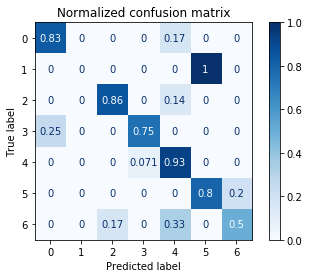

In [28]:
rf = RandomForestClassifier(class_weight = 'balanced', n_jobs = -1).fit(X_train, y_train)
plotCM(rf, X_test, y_test)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   32.4s finished


Normalized confusion matrix
[[0.83333333 0.         0.         0.         0.16666667 0.
  0.        ]
 [0.         0.         0.         0.         0.         1.
  0.        ]
 [0.         0.         0.85714286 0.         0.         0.14285714
  0.        ]
 [0.125      0.         0.         0.875      0.         0.
  0.        ]
 [0.         0.         0.14285714 0.07142857 0.78571429 0.
  0.        ]
 [0.         0.         0.         0.         0.         1.
  0.        ]
 [0.         0.         0.16666667 0.         0.16666667 0.
  0.66666667]]
Accuracy: 0.7916666666666666


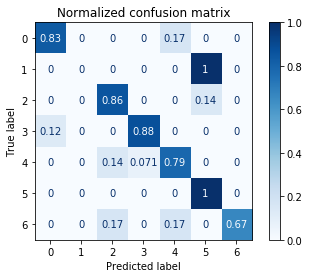

In [33]:
rf_grid = {
    "n_estimators": range(50, 250, 50),
    "max_depth": range(10,16,2),
    'max_leaf_nodes': range(40,60,5)
}
rf_cv = gridsearch(RandomForestClassifier(class_weight = 'balanced', n_jobs = -1), rf_grid, X_train, y_train)
plotCM(rf_cv['model'], X_test, y_test)

In [34]:
rf_cv['params']

{'max_depth': 10, 'max_leaf_nodes': 40, 'n_estimators': 200}

## Scaled

In [35]:
scaler = RobustScaler().fit(X)
print(f"Medians: {scaler.center_}")
print(f"IQRs: {scaler.scale_}")

Medians: [ 6.17000e-01  6.09000e-01 -6.73900e+00  4.70000e-02  2.29000e-01
  1.19000e-01  4.01000e-01  1.19856e+02]
IQRs: [ 0.1915   0.2505   3.0415   0.0465   0.4159   0.10235  0.2535  45.436  ]


In [36]:
X_scaled = scaler.transform(X)
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 1)

Normalized confusion matrix
[[0.83333333 0.         0.         0.         0.16666667 0.
  0.        ]
 [0.         0.         0.         0.         0.         1.
  0.        ]
 [0.         0.         0.85714286 0.         0.         0.14285714
  0.        ]
 [0.25       0.         0.         0.75       0.         0.
  0.        ]
 [0.         0.         0.         0.14285714 0.85714286 0.
  0.        ]
 [0.         0.         0.         0.         0.         1.
  0.        ]
 [0.         0.         0.16666667 0.         0.16666667 0.
  0.66666667]]
Accuracy: 0.7916666666666666


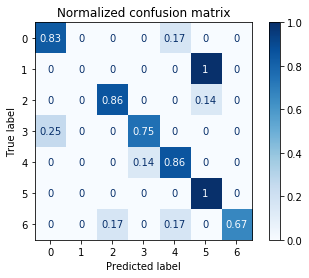

In [37]:
rf_s = RandomForestClassifier(n_jobs = -1, random_state = 1).fit(Xs_train, ys_train)
plotCM(rf_s, Xs_test, ys_test)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   29.4s finished


Normalized confusion matrix
[[0.83333333 0.         0.         0.         0.16666667 0.
  0.        ]
 [0.         0.5        0.         0.         0.         0.5
  0.        ]
 [0.         0.         0.85714286 0.         0.         0.14285714
  0.        ]
 [0.25       0.         0.         0.75       0.         0.
  0.        ]
 [0.         0.         0.         0.07142857 0.92857143 0.
  0.        ]
 [0.         0.         0.         0.         0.         1.
  0.        ]
 [0.         0.         0.16666667 0.         0.33333333 0.
  0.5       ]]
Accuracy: 0.8125


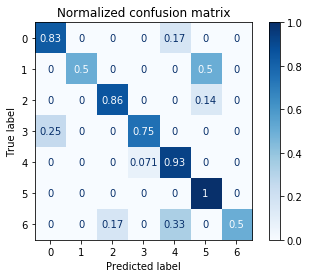

In [38]:
rfs_cv = gridsearch(RandomForestClassifier(class_weight = 'balanced', n_jobs = -1, random_state = 1), rf_grid, Xs_train, ys_train)
plotCM(rfs_cv['model'], Xs_test, ys_test)

In [39]:
rfs_cv['params']

{'max_depth': 12, 'max_leaf_nodes': 40, 'n_estimators': 200}

### Balance

In [40]:
Xb, yb = RandomOverSampler().fit_sample(X, y)
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=0.2, random_state = 1)

Normalized confusion matrix
[[0.9        0.         0.1        0.         0.         0.
  0.        ]
 [0.         1.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.8        0.         0.         0.06666667
  0.13333333]
 [0.         0.         0.         0.92857143 0.         0.
  0.07142857]
 [0.16666667 0.         0.         0.         0.66666667 0.
  0.16666667]
 [0.         0.         0.         0.         0.         1.
  0.        ]
 [0.         0.         0.         0.         0.3        0.1
  0.6       ]]
Accuracy: 0.8493150684931506


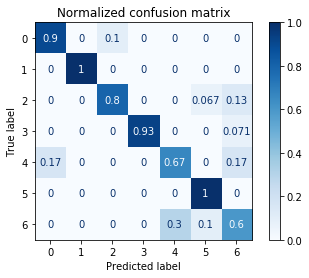

In [41]:
rf_b = RandomForestClassifier(n_jobs = -1).fit(Xb_train, yb_train)
plotCM(rf_b, Xb_test, yb_test)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   29.5s finished


Normalized confusion matrix
[[0.9        0.         0.1        0.         0.         0.
  0.        ]
 [0.         1.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.8        0.         0.         0.06666667
  0.13333333]
 [0.07142857 0.         0.         0.85714286 0.         0.
  0.07142857]
 [0.16666667 0.         0.         0.         0.66666667 0.
  0.16666667]
 [0.         0.         0.         0.         0.         1.
  0.        ]
 [0.         0.         0.         0.         0.2        0.1
  0.7       ]]
Accuracy: 0.8493150684931506


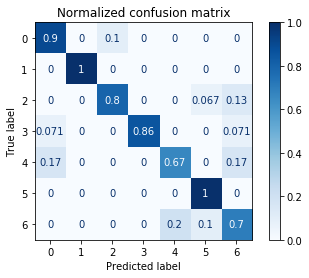

In [42]:
rfb_cv = gridsearch(RandomForestClassifier(n_jobs = -1), rf_grid, Xb_train, yb_train)
plotCM(rfb_cv['model'], Xb_test, yb_test)

In [43]:
rfb_cv['params']

{'max_depth': 10, 'max_leaf_nodes': 40, 'n_estimators': 150}

## Balance + scale

In [45]:
scalerb = RobustScaler().fit(Xb)
print(f"Medians: {scalerb.center_}")
print(f"IQRs: {scalerb.scale_}")

Medians: [ 5.9850e-01  5.7400e-01 -6.8890e+00  4.8500e-02  2.9000e-01  1.1650e-01
  3.8100e-01  1.2303e+02]
IQRs: [ 0.20175   0.29575   4.052     0.05375   0.575125  0.113975  0.28
 44.48625 ]


In [46]:
Xb_scaled = scalerb.transform(Xb)
Xbs_train, Xbs_test, ybs_train, ybs_test = train_test_split(Xb_scaled, yb, test_size=0.2, random_state = 1)

Normalized confusion matrix
[[0.9        0.         0.1        0.         0.         0.
  0.        ]
 [0.         1.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.8        0.         0.         0.13333333
  0.06666667]
 [0.         0.         0.         0.92857143 0.         0.
  0.07142857]
 [0.16666667 0.         0.         0.         0.66666667 0.
  0.16666667]
 [0.         0.         0.         0.         0.         1.
  0.        ]
 [0.         0.         0.         0.         0.2        0.
  0.8       ]]
Accuracy: 0.8767123287671232


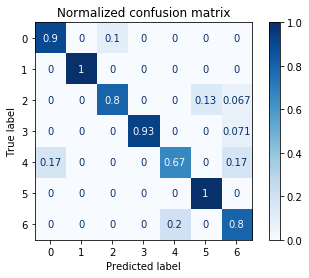

In [47]:
rf_bs = RandomForestClassifier(n_jobs = -1, random_state = 1).fit(Xbs_train, ybs_train)
plotCM(rf_bs, Xbs_test, ybs_test)

In [57]:
import pickle
with open('rf_model.sav', 'wb') as f:
    pickle.dump(rf_bs, f)
with open('scalers.data', 'wb') as f:
    pickle.dump({'center': scalerb.center_,'scale': scalerb.scale_}, f)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   29.1s finished


Normalized confusion matrix
[[0.9        0.         0.1        0.         0.         0.
  0.        ]
 [0.         1.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.8        0.         0.         0.06666667
  0.13333333]
 [0.07142857 0.         0.         0.85714286 0.         0.
  0.07142857]
 [0.16666667 0.         0.         0.         0.66666667 0.
  0.16666667]
 [0.         0.         0.         0.         0.         1.
  0.        ]
 [0.         0.         0.         0.         0.2        0.
  0.8       ]]
Accuracy: 0.863013698630137


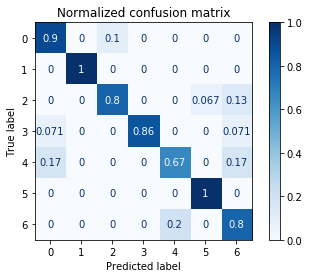

In [48]:
rfbs_cv = gridsearch(RandomForestClassifier(n_jobs = -1, random_state = 1), rf_grid, Xbs_train, ybs_train)
plotCM(rfbs_cv['model'], Xbs_test, ybs_test)